In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

file_path = "C:/Users/solmi/Downloads/인공지능개론/diabetes.csv"  
df = pd.read_csv(file_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [150]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [151]:
# Outcome 삭제
df = df.drop('Outcome', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [152]:
X = df.drop('BMI', axis = 1)
y = df['BMI']

In [153]:

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
#원핫인코딩
Y = pd.get_dummies(y).values
X = X.values

In [155]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [156]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [157]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [158]:
# 학습 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 


((614, 7), (154, 7), (614, 248), (154, 248))

In [159]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 8)                 64        
                                                                 
 dense_44 (Dense)            (None, 30)                270       
                                                                 
 dense_45 (Dense)            (None, 30)                930       
                                                                 
 dense_46 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [160]:
N_EPOCHS = 10

history = model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 65.5916 - mse: 65.5916 - val_loss: 2.0496 - val_mse: 2.0496
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 1.3387 - mse: 1.3387 - val_loss: 6.2898 - val_mse: 6.2898
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 1.7635 - mse: 1.7635 - val_loss: 2.0385 - val_mse: 2.0385
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 1.2722 - mse: 1.2722 - val_loss: 1.5481 - val_mse: 1.5481
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4841 - mse: 0.4841 - val_loss: 0.7888 - val_mse: 0.7888
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.9391 - mse: 0.9391 - val_loss: 0.2450 - val_mse: 0.2450
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.9358 - mse: 0.9358 - val_loss: 0.3601 - val_mse: 0.3601
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7870 - mse: 0

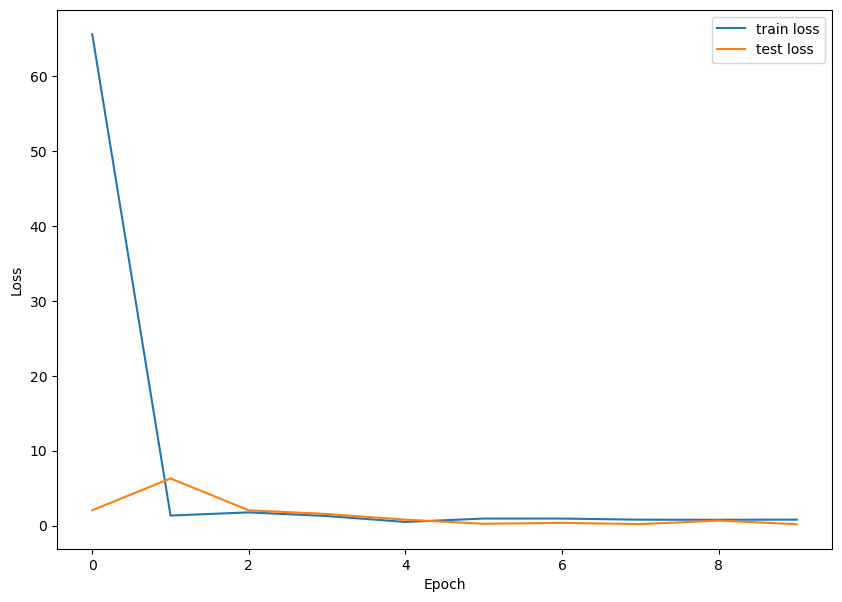

In [161]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [162]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 27ms/step - loss: 0.1811 - mse: 0.1811


[0.18114794790744781, 0.18114794790744781]